In [66]:
import nltk
import pandas as pd
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pickle

In [9]:
data=pd.read_csv("spam_ham_dataset.csv")

In [17]:
data=data[['text','label']]
data.head()

,text,label
0,Subject: enron methanol ; meter # : 988291\r\n...,ham
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",ham
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",ham
3,"Subject: photoshop , windows , office . cheap ...",spam
4,Subject: re : indian springs\r\nthis deal is t...,ham


In [20]:
ps=PorterStemmer()
corpus=[]
for i in range(len(data)):
    mail=re.sub('[^a-zA-Z]+',' ', data['text'][i])
    mail=mail.lower()
    mail=mail.split()
    mail=[ps.stem(words) for words in mail if not words in stopwords.words('english')]
    mail=' '.join(mail)
    corpus.append(mail)
    

In [25]:
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()

In [65]:
y=pd.get_dummies(data['label'])
print(y)
y=y.iloc[:,1].values
label=['ham','spam']

      ham  spam
0       1     0
1       1     0
2       1     0
3       0     1
4       1     0
...   ...   ...
5166    1     0
5167    1     0
5168    1     0
5169    1     0
5170    0     1

[5171 rows x 2 columns]


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [59]:
spam_detect_model=MultinomialNB(alpha=0.8).fit(X_train,y_train)

In [60]:
ypred=spam_detect_model.predict(X_test)

In [61]:
accuracy_score (y_test,ypred )

0.9729381443298969

In [62]:
cm = confusion_matrix(y_test, ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1126   16]
 [  26  384]]

True Positives(TP) =  1126

True Negatives(TN) =  384

False Positives(FP) =  16

False Negatives(FN) =  26


<AxesSubplot:>

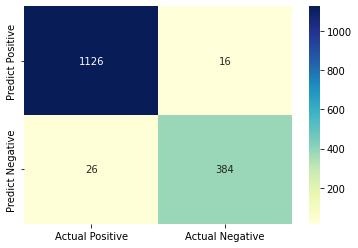

In [63]:

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'], 
                                 index=['Predict Positive', 'Predict Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
filename="spam_detection.pkl"
pickle.dump(model, open(filename, 'wb'))